In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
%matplotlib inline

from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D,MaxPool2D

from tensorflow.keras.applications.efficientnet import EfficientNetB0

#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [3]:
#Loading the paths for the datasets
covid = os.listdir("/content/drive/MyDrive/Colab Notebooks/x-ray/train/COVID19")
# normal = os.listdir("/content/drive/MyDrive/Colab Notebooks/x-ray/train/NORMAL")
pneumonia = os.listdir("/content/drive/MyDrive/Colab Notebooks/x-ray/train/PNEUMONIA")
# tuber = os.listdir("/content/drive/MyDrive/Colab Notebooks/x-ray/train/TURBERCULOSIS")

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#Defining a funtion names "sampleimage" to view all types of images
def sampleimage(image_path):
    img = load_img(image_path)
    print((img_to_array(img)).shape)
    plt.imshow(img)
    plt.show()

COVID19
(885, 1036, 3)


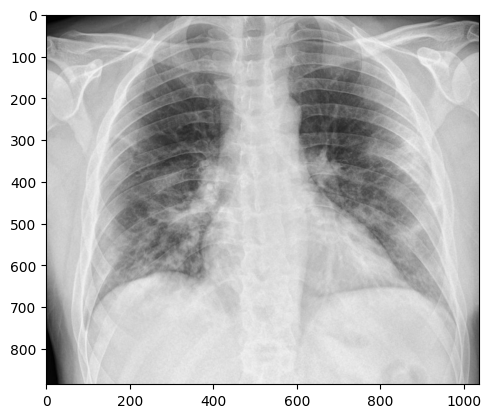

PNEUMONIA
(439, 712, 3)


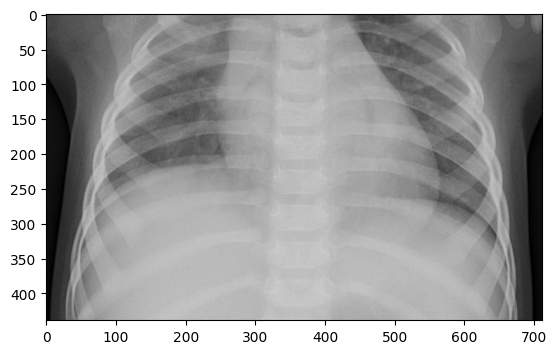

In [5]:
labels = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#COVID 19 image 
image_path="/content/drive/MyDrive/Colab Notebooks/x-ray/train/COVID19/COVID19(110).jpg"
print(labels[0])
sampleimage(image_path)

#Pneumonia image
print(labels[2])
image_path="/content/drive/MyDrive/Colab Notebooks/x-ray/train/PNEUMONIA/person1_bacteria_1.jpeg"
sampleimage(image_path)


In [6]:
dataset_dir="/content/drive/My Drive/Colab Notebooks/x-ray/train"

In [7]:
# imgpath=[]
# for (dirnames, foldernames, filenames) in os.walk(dataset_dir): #get the full path name of a type of file into all subdirectories with walk
#     print(dirnames,foldernames,filenames)
#     for filename in filenames:
#         if (filename[-3:]=='png'): #using list slicing we can fetch the last 'n' elements from list
#             imgpath.append(os.path.join(dirnames, filename)) #os.path.join  combines one or more path names into a single path and then paths will be appended to list imgpath


In [8]:
from tqdm import tqdm

In [9]:
# #initialize the list of image data and target labels
# x=[]
# y=[]
# resize=150

# dic={'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'TURBERCULOSIS': 'TURBERCULOSIS'} #dictionary to map file label name with target label name
# for imgpaths in tqdm(imgpath):  #tqdm is used to make terminal progress bar
#     label=imgpaths.split(os.path.sep)[-2]
#     image=cv2.imread(imgpaths)
#     image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
#     image=cv2.resize(image, (resize, resize)) /255 #resizing the image
    

#     #updates the respective data and target label lists
#     x.append(image)
#     y.append(dic[label])

In [10]:
labels = ['COVID19', 'PNEUMONIA']
x = []
Y = []
for i in labels:
    folder_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/x-ray", "train", i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150))
        x.append(img)
        Y.append(i)

In [11]:
x = np.array(x)
Y = np.array(Y)

print(x.shape)
print(Y.shape)

(4335, 150, 150, 3)
(4335,)


In [12]:
# size=[]
# for file in imgpath: #for loop to get image paths
#     img=plt.imread(file) #used to read an image from a file into an array
#     size.append(img.shape) #image.shape returns a tuple of the number of rows, columns, and channels (if the image is color).
# pd.Series(size).value_counts() #it retures a series containing counts of unique values

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = []
for i in Y:
    y.append(labels.index(i))
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y)

In [14]:
print(x.shape)
print(y.shape)

(4335, 150, 150, 3)
(4335, 2)


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=21)

In [16]:
print("Train data shape       : ", x_train.shape[0])
print("Test data shape        : ", x_test.shape[0])
print("Train Input shape      : ", x_train.shape)
print("Train output shape     : ", y_train.shape)
print("Test input shape       : ", x_test.shape)
print("Test output shape      : ", y_test.shape)
print("Validation input shape : ", x_valid.shape)
print("Validation output shape: ", y_valid.shape)

Train data shape       :  2774
Test data shape        :  867
Train Input shape      :  (2774, 150, 150, 3)
Train output shape     :  (2774, 2)
Test input shape       :  (867, 150, 150, 3)
Test output shape      :  (867, 2)
Validation input shape :  (694, 150, 150, 3)
Validation output shape:  (694, 2)


In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
model.add(AveragePooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64,  activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 32)       0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                        

In [20]:
#! pip install numba
#!pip install tensorflow-gpu

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

tensorboard = TensorBoard(log_dir = 'logs') 
# checkpoint = ModelCheckpoint(
#                              monitor="val_accuracy",
#                              save_best_only=True,
#                              mode="auto",
#                              verbose=1) 
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto',verbose=1)


In [ ]:
import numba.cuda
   
from timeit import default_timer as timer

batch_size=32

# start = time.time()
# @numba.cuda.jit
hist = model.fit(x_train, y_train, batch_size=32, epochs= 5,
                  validation_data = (x_valid, y_valid), callbacks=[tensorboard])
#end = time.time()
# total = end - start
# print("Total time took %0.1f minutes")

Epoch 1/5
87/87 [==============================] - 25s 100ms/step - loss: 1.4506 - accuracy: 0.9214 - val_loss: 0.0971 - val_accuracy: 0.9712
Epoch 2/5
87/87 [==============================] - 7s 83ms/step - loss: 0.1001 - accuracy: 0.9686 - val_loss: 0.0593 - val_accuracy: 0.9870
Epoch 3/5
87/87 [==============================] - 7s 83ms/step - loss: 0.0799 - accuracy: 0.9748 - val_loss: 0.0554 - val_accuracy: 0.9870
Epoch 4/5
87/87 [==============================] - 7s 79ms/step - loss: 0.0786 - accuracy: 0.9748 - val_loss: 0.0562 - val_accuracy: 0.9899
Epoch 5/5
87/87 [==============================] - 7s 81ms/step - loss: 0.0796 - accuracy: 0.9773 - val_loss: 0.1582 - val_accuracy: 0.9625


In [ ]:
model.save('inp_CNN.h5')

In [ ]:
from keras.models import load_model

model.save('cnn.h5') 
del model  
model = load_model('cnn.h5')

In [25]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy is: ', accuracy)
print("Test loss is    : ", loss)

28/28 [==============================] - 1s 27ms/step - loss: 0.1940 - accuracy: 0.9481
Test accuracy is:  0.9480968713760376
Test loss is    :  0.19401486217975616


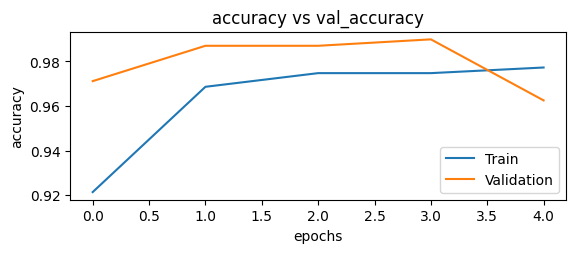

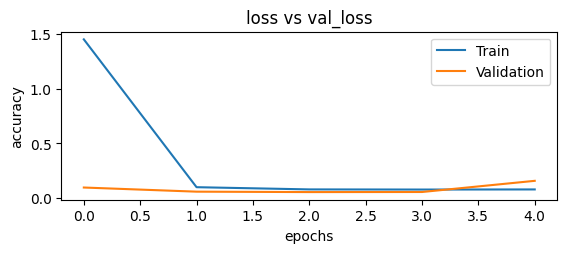

In [26]:
plt.subplot(211)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy vs val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.subplot(212)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss vs val_loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [27]:
y_pred = model.predict(x_test)
y_pred=np.round(y_pred)

28/28 [==============================] - 1s 15ms/step


In [28]:
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

0.9480968858131488

In [29]:
from sklearn.metrics import classification_report, confusion_matrix,f1_score
pred = model.predict(x_test)
pred.argmax(axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
print(cm)

28/28 [==============================] - 0s 14ms/step
[[ 91  10]
 [ 35 731]]


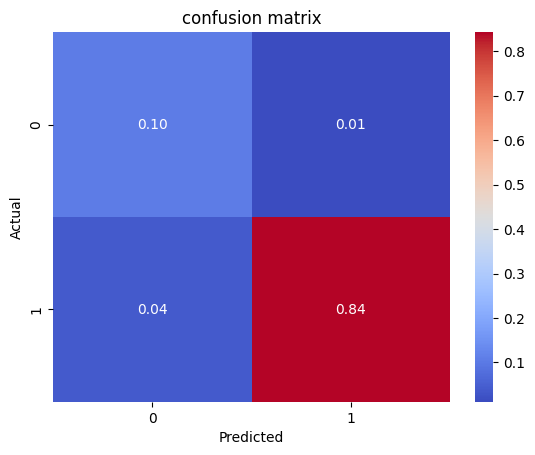

In [30]:
import seaborn as sns

#cn1 = pd.DataFrame(cm, columns=labels, index=labels)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()

In [31]:
print(le.classes_)
print(labels)

[0 1]
['COVID19', 'PNEUMONIA']


In [32]:
#Classification report
print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       101
           1       0.99      0.95      0.97       766

    accuracy                           0.95       867
   macro avg       0.85      0.93      0.89       867
weighted avg       0.96      0.95      0.95       867



In [33]:
print("F1 Score: ", f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='macro'))

F1 Score:  0.8859507321194193


In [34]:
import joblib
joblib.dump(model, 'cnn_joblib.pkl')

['cnn_joblib.pkl']

#**Predicting the Output**

In [35]:
#Loading the paths for the datasets
covid_test = "/content/drive/MyDrive/Colab Notebooks/x-ray/train/COVID19/COVID19(110).jpg"
pneumonia_test = "/content/drive/MyDrive/Colab Notebooks/x-ray/train/PNEUMONIA/person451_bacteria_1942.jpeg"

In [36]:
img_path = [covid_test, pneumonia_test]

In [37]:
print(img_path)

['/content/drive/MyDrive/Colab Notebooks/x-ray/train/COVID19/COVID19(110).jpg', '/content/drive/MyDrive/Colab Notebooks/x-ray/train/PNEUMONIA/person451_bacteria_1942.jpeg']


In [38]:
images_2 = []

img_path1 = cv2.imread(covid_test)
img_path1 = cv2.cvtColor(img_path1, cv2.COLOR_BGR2RGB)
img_path1 = cv2.resize(img_path1, (150, 150)) / 255
images_2.append(img_path1)

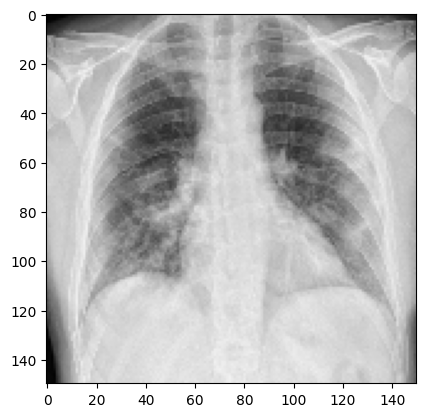

In [39]:
for i in images_2:
  plt.imshow(i)

In [40]:
img_path3 = cv2.imread(pneumonia_test)
img_path3 = cv2.cvtColor(img_path3, cv2.COLOR_BGR2RGB)
img_path3 = cv2.resize(img_path3, (150, 150)) / 255
images_2.append(img_path3)

In [41]:
# images = []
# for i in img_path:
#   img_path = cv2.imread(img_path)
#   img_path = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)
#   img_path = cv2.resize(img_path, (150, 150)) / 255
#   images.append(img_path)

In [42]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# #Defining a funtion names "sampleimage" to view all types of images
# def sampleimage(image_path):
#     img = load_img(image_path)
#     print((img_to_array(img)).shape)
#     plt.imshow(img)
#     plt.show()

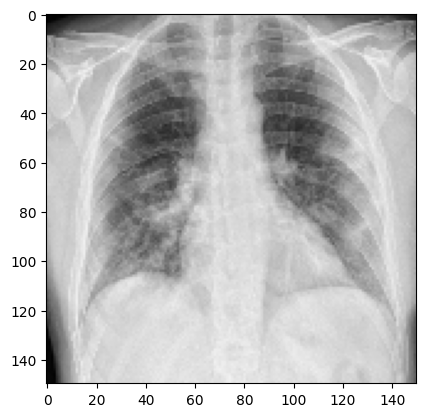

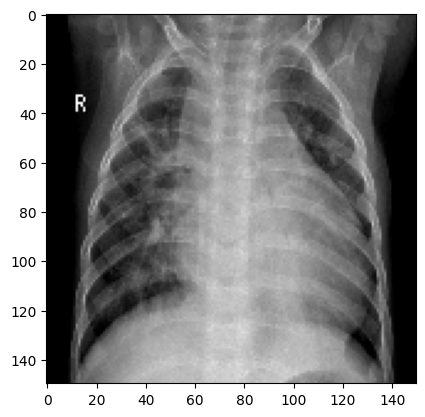

In [43]:
for i in images_2:
  plt.imshow(i)
  plt.show()

In [44]:
count = 0
for _ in images_2:
  images_2[count] = np.array(images_2[count])
  images_2[count] = np.expand_dims(images_2[count], axis=0)
  print(images_2[count].shape)
  count+=1

(1, 150, 150, 3)
(1, 150, 150, 3)


In [45]:
prediction=[]
for i in images_2:
  prediction.append(model.predict(i))

1/1 [==============================] - 0s 22ms/step


In [46]:
print(prediction)

[array([[0.41136372, 0.5886363 ]], dtype=float32), array([[0.5288381, 0.4711619]], dtype=float32)]


In [47]:
output = []
for p in prediction:
  print(p)
  output.append(np.argmax(p, axis=1))

[[0.41136372 0.5886363 ]]
[[0.5288381 0.4711619]]


In [48]:
# 'COVID19'       : 0
#  'NORMAL'        : 1
#  'PNEUMONIA'     : 2
#  'TURBERCULOSIS' : 3

In [49]:
print(output)

[array([1]), array([0])]


In [50]:
title=[]

for out in output:
  if out>0.5 and out<1.5:
    title.append("Covid")
  else:
    title.append('PNEUMONIA' )

In [51]:
len(images_2)

2

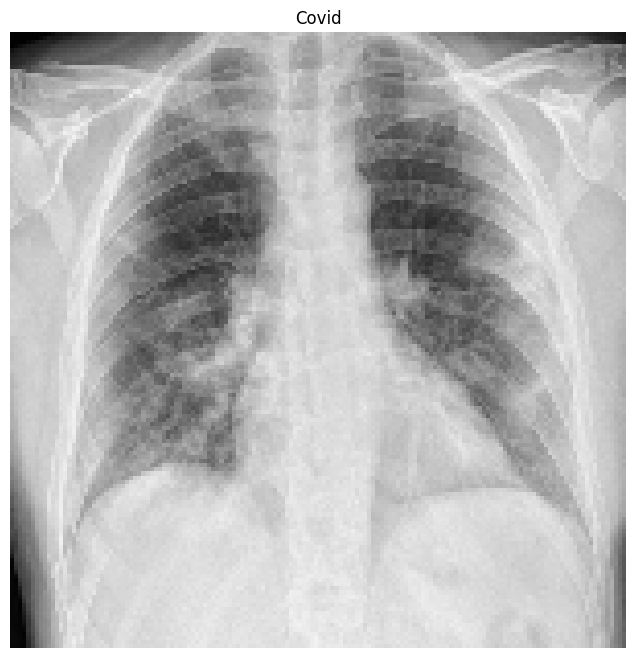

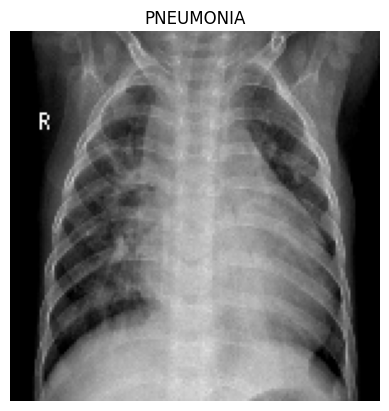

In [52]:
plt.figure(figsize=(8, 8))

i=0

for img in images_2:
  plt.imshow(np.squeeze(img), cmap='gray')
  plt.title(title[i])
  plt.axis('off')
  i+=1
  plt.show()